# Exploring Facial Features For Gender Recognition

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import sparse as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, log_loss, confusion_matrix
%matplotlib inline

DATAFOLDER = "/Users/snuffles753/Documents/NYU-GSAS/ds1004/term-project/data"

In [29]:
b = np.load(os.path.join(DATAFOLDER, 'sparse_matrix.npz'))
data = b['data']
m_format = b['format']
shape = b['shape']
row = b['row']
col = b['col']

In [34]:
face_features = sp.csr_matrix( (data,(row,col)), shape=shape ).todense()
print(face_features.shape)
print(face_features[0:5, 0:2])

(33990, 90001)
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 3.  0.]
 [ 4.  0.]]


In [54]:
file_map = pd.read_csv(os.path.join(DATAFOLDER, 'processed_filenames.csv'))
print(file_map.shape)
file_map.head()

(33990, 3)


,Unnamed: 0,file_name,image_number
0,0,18581372_1944-08-11_2007.jpg,0
1,1,12631272_1987-06-18_2010.jpg,1
2,2,17983472_1987-12-31_2010.jpg,2
3,3,17736372_1919-03-28_1950.jpg,3
4,4,1902872_1908-01-01_1948.jpg,4


In [40]:
wiki_map = pd.read_csv(os.path.join(DATAFOLDER, 'wiki_data.csv'))
wiki_map['file'] = wiki_map['file'].str.replace('cropped_', '')
wiki_map.head()

,Unnamed: 0,file,gender
0,0,10000217_1981-05-05_2009.jpg,1.0
1,1,10000548_1925-04-04_1964.jpg,1.0
2,2,100012_1948-07-03_2008.jpg,1.0
3,3,10001965_1930-05-23_1961.jpg,1.0
4,4,10002116_1971-05-31_2012.jpg,0.0


In [70]:
mapped = file_map.merge(wiki_map, left_on='file_name', right_on='file', how='left')
mapped.describe()

,Unnamed: 0_x,image_number,Unnamed: 0_y,gender
count,33990.000000,33990.000000,33990.000000,33293.000000
mean,16994.500000,16994.500000,31370.049073,0.730844
std,9812.212161,9812.212161,18065.059025,0.443528
min,0.000000,0.000000,0.000000,0.000000
25%,8497.250000,8497.250000,15932.250000,0.000000
50%,16994.500000,16994.500000,31345.500000,1.000000
75%,25491.750000,25491.750000,47159.500000,1.000000
max,33989.000000,33989.000000,62327.000000,1.000000


In [56]:
gender = mapped[['gender']].values
print(gender.shape)
print(gender)

(33990, 1)
[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 0.]
 [ 1.]]


In [57]:
data = face_features[:,1:]
print(data.shape)
print(data)

(33990, 90000)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [60]:
data_train, data_test, labels_train, labels_test = train_test_split(data, gender, test_size=0.20, random_state=42)


In [80]:
print(data_test.shape)
print(np.any(np.isnan(labels_train)))
labels_train2 = np.nan_to_num(labels_train)
print(np.any(np.isnan(labels_train2)))
print(np.any(np.isnan(labels_test)))
labels_test2 = np.nan_to_num(labels_test)
print(np.any(np.isnan(labels_test2)))


(6798, 90000)
True
False
True
False


/Users/snuffles753/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


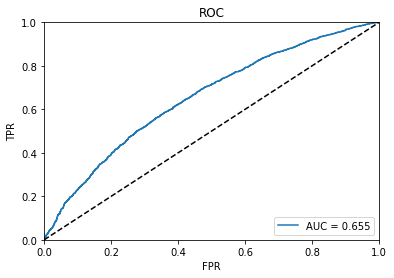

In [81]:
model = LogisticRegression()
model.fit(data_train, labels_train2)
y_pred = model.predict_proba(data_test)[:, 1]
accuracy = accuracy_score(labels_test2, (y_pred > 0.5).astype(int))
logloss = log_loss(labels_test2, y_pred)
fpr, tpr, thresholds = roc_curve(labels_test2, y_pred)
roc_auc = auc(fpr, tpr)
metrics = {'Accuracy': accuracy, 'ROC AUC': roc_auc, 'Log Loss': logloss}
plt.plot(fpr, tpr, label='AUC = {0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")